In [229]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [230]:
import pandas as pd
df=pd.read_csv('loan_approval_dataset_4269.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
conData=0
df=df.fillna(conData)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [231]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])

# Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


In [232]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


<Axes: xlabel='loan_status', ylabel='cibil_score'>

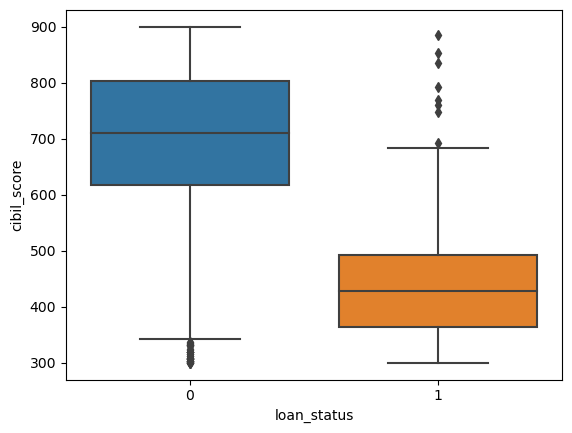

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='loan_status', y='cibil_score', data=df)

<Axes: xlabel='cibil_score', ylabel='loan_amount'>

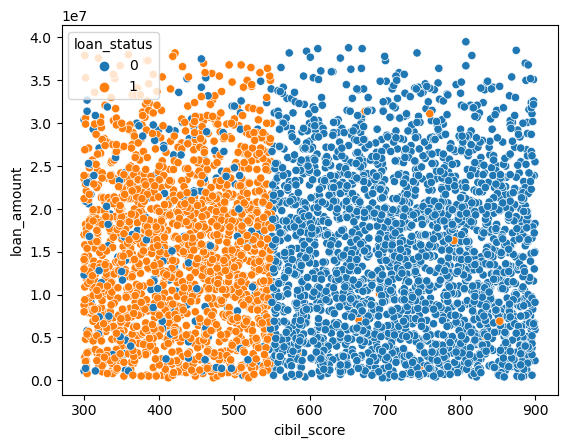

In [234]:
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df)

In [235]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [236]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [237]:
#sns.countplot(x='cibil_grp',hue='loan_status',data=df)

In [238]:
import numpy as np
class WOE_Encoder():
    def __init__(self, cols=None, size=None):
            self.cols = cols
            self.min_samples=1
            #self.bins=10000
            self.bins=int(size/70)
            self._mapping = {}
            
    def WOE_fit(self, X, y):
        for col in self.cols:
            X[col]=X[col].fillna(-9999)
            if (len(np.unique(X[col]))>100):
                binned_x = pd.qcut(X[col], self.bins,  duplicates='drop')
                d0 = pd.DataFrame({'x': binned_x, 'y':y})
            else:
                d0 = pd.DataFrame({'x': X[col], 'y': y})
            #print (d0)
            # Share of positive (resp. negative) labels for each category P(X=X_i | Y=1) (resp. P(X=X_i | Y=0))
            #mapping = y.groupby(X[col]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping = y.groupby(d0["x"]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping['neg'] = mapping['count'] - mapping['pos']
            mapping[['pos', 'neg']] /= mapping[['pos', 'neg']].sum()
            # For corner cases, defaulting to WOE = 0 (meaning no info). To avoid division by 0 we use default values.
            undef = (mapping['count'] < self.min_samples) | (mapping['pos'] == 0) | (mapping['neg'] == 0)
            mapping.loc[undef, ['pos', 'neg']] = -1
            # Final step, log of ratio of probabily estimates
            mapping['value'] = np.log((mapping['pos'] +0.0001)/ (mapping['neg']+0.0001))
            self._mapping[col] = mapping
            

        X_encoded = X.copy(deep=True)
        for col, mapping in self._mapping.items():
            X_encoded.loc[:, col] = X_encoded[col].fillna(-9999).map(mapping['value'])
            X_encoded[col].fillna(0, inplace=True)
             
        return X_encoded 

In [239]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
y = df['loan_status']  # Target variable
X = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns



# Select only the numerical columns for scaling (excluding 'loan_status')
#numerical_columns = [ 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                      'bank_asset_value']

numerical_columns = [ 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

num_df = X.select_dtypes(include=['float64', 'int64']).copy()
cat_df = X.select_dtypes(include=['object']).copy()
categorical_cols = cat_df.columns.tolist()
numerical_columns=num_df.columns.tolist()
all_columns=X.columns.tolist()
print(all_columns)
 

# Apply scaling to the numerical columns
#x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


# Display the scaled feature variables (X) and the target variable (y)
#print("Scaled Feature Variables (x):")
#print(x.head())

#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

#enc = WeightOfEvidenceEncoder(cols=numerical_columns)
#x[numerical_columns] = enc.fit_transform(x[numerical_columns], y)
#x.head()

columns_for_trans=all_columns

#columns_for_trans=['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Obj = WOE_Encoder(cols=columns_for_trans, size=X[columns_for_trans].shape[0])
X[columns_for_trans] = Obj.WOE_fit(X[columns_for_trans], y)

# Display the scaled feature variables (X) and the target variable (y)
print("aWOE Feature Variables (x):")
print(x.head())


['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
aWOE Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.003069          0              0      0.645880     0.225516   
1         -0.084643          1              1      0.596257     0.351419   
2         -0.027520          0              0      0.194406    -0.320248   
3         -0.027520          0              0      0.348575     0.225516   
4          0.079571          1              1     -0.287052     0.010311   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.071215    -3.726799                 -0.320248                 0.385268   
1   0.216850     2.266956                  0.165257                 0.210344   
2   0.199476     2.352684                 -0.220052                

In [240]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.003069,-0.010109,0.000716,0.645880,0.225516,0.071215,-3.632083,-0.320248,0.385268,0.418496,-0.066175
1,-0.084643,0.010174,-0.000705,0.596257,0.351419,0.216850,2.266956,0.165257,0.209649,0.179281,0.197739
2,-0.027520,-0.010109,0.000716,0.194406,-0.320248,0.199476,2.352684,-0.220052,0.421361,0.042977,0.242405
3,-0.027520,-0.010109,0.000716,0.348575,0.225516,0.216850,2.998931,-0.110366,0.092658,0.079481,-0.066175
4,0.079571,0.010174,-0.000705,-0.287052,0.010311,0.199476,3.059407,0.234936,0.000882,0.141177,-1.059400
...,...,...,...,...,...,...,...,...,...,...,...
4264,0.079571,-0.010109,-0.000705,-0.413028,0.079481,0.071215,2.623065,0.165257,0.082788,-0.088515,0.544169
4265,-0.084643,0.010174,-0.000705,-0.225047,0.202131,0.199476,0.000000,-0.167858,-0.193007,-0.066175,0.049502
4266,-0.003069,0.010174,0.000716,0.168575,-0.216458,0.055539,2.222663,-0.303364,-0.113712,0.526107,0.151539
4267,0.022175,0.010174,0.000716,0.596257,-0.054289,0.216850,0.000000,-0.366421,-0.055264,0.141177,-0.112540


In [241]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

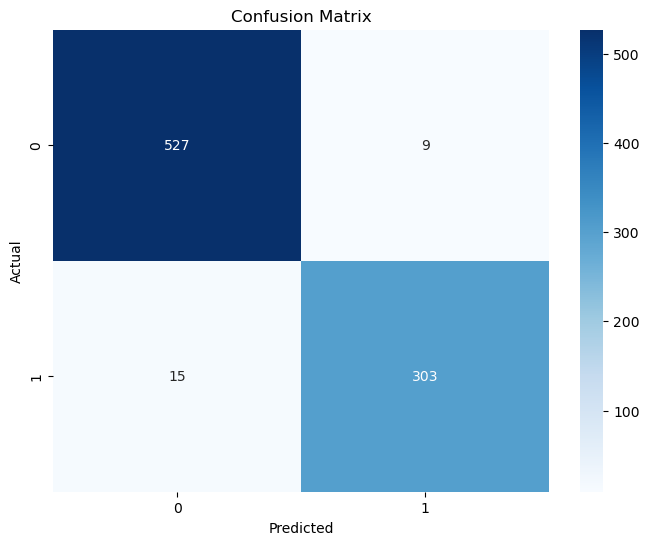

GaussianNB Classifier Metrics:
Accuracy: 0.9718969555035128
Precision: 0.9718887292007491
Recall: 0.9718969555035128
F1 Score: 0.9718413403257835
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.97      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [242]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB()

# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("GaussianNB Report:\n", classification_rep)

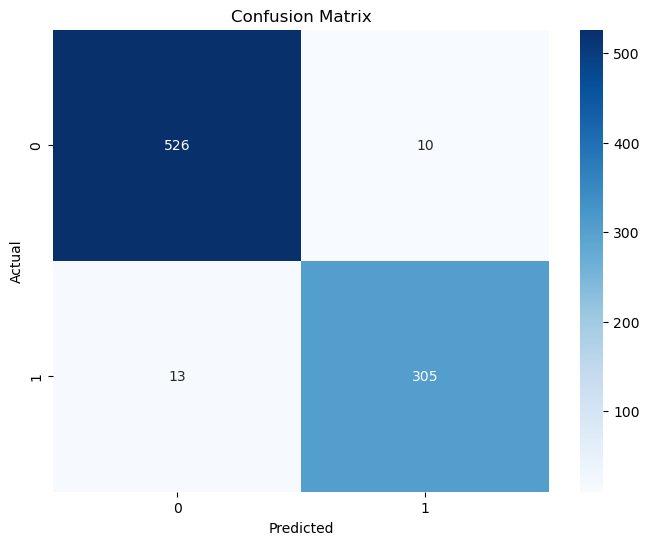

LogisticRegression Classifier Metrics:
Accuracy: 0.9730679156908665
Precision: 0.9730411219203459
Recall: 0.9730679156908665
F1 Score: 0.973041675238393
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

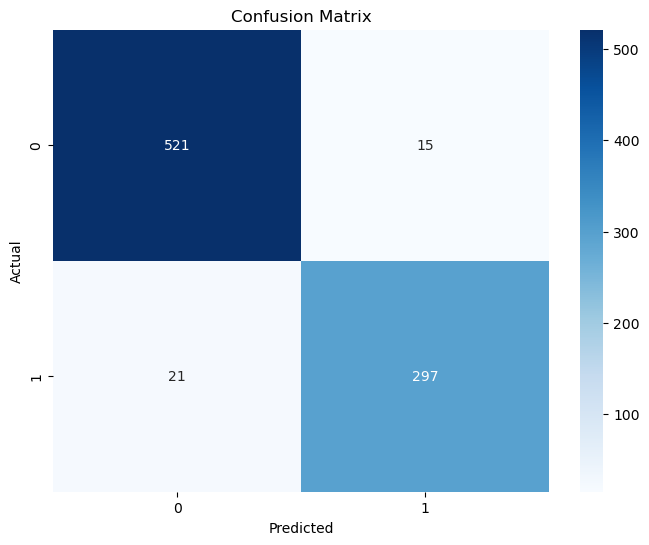

Decision Tree Classifier Metrics:
Accuracy: 0.9578454332552693
Precision: 0.9577798721150604
Recall: 0.9578454332552693
F1 Score: 0.957762010488675
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       536
           1       0.95      0.93      0.94       318

    accuracy                           0.96       854
   macro avg       0.96      0.95      0.95       854
weighted avg       0.96      0.96      0.96       854



In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

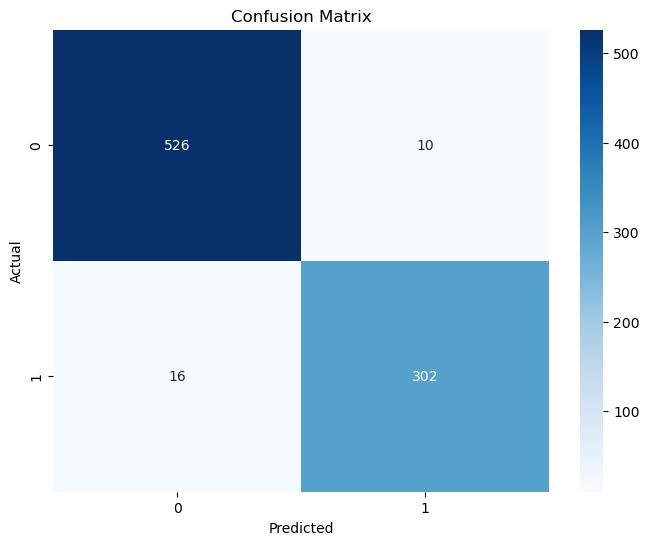

Random Forest Classifier Metrics:
Accuracy: 0.9695550351288056
Precision: 0.9695372530198009
Recall: 0.9695550351288056
F1 Score: 0.9694947853529318
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.97      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

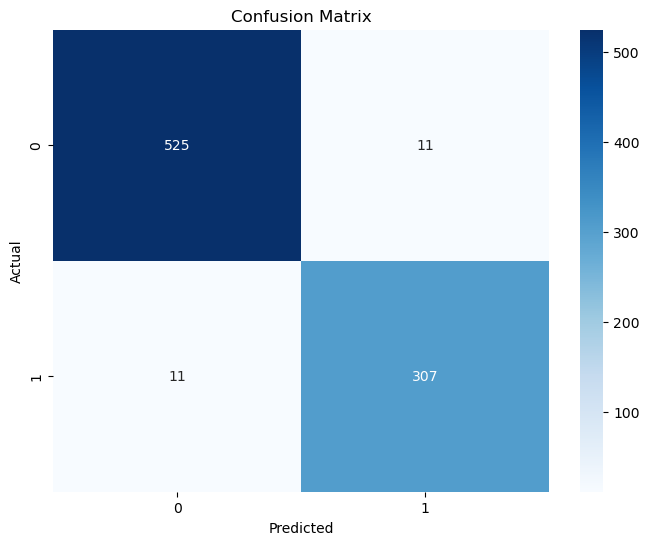

SVM Classifier Metrics:
Accuracy: 0.9742388758782201
Precision: 0.9742388758782201
Recall: 0.9742388758782201
F1 Score: 0.9742388758782201
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [246]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

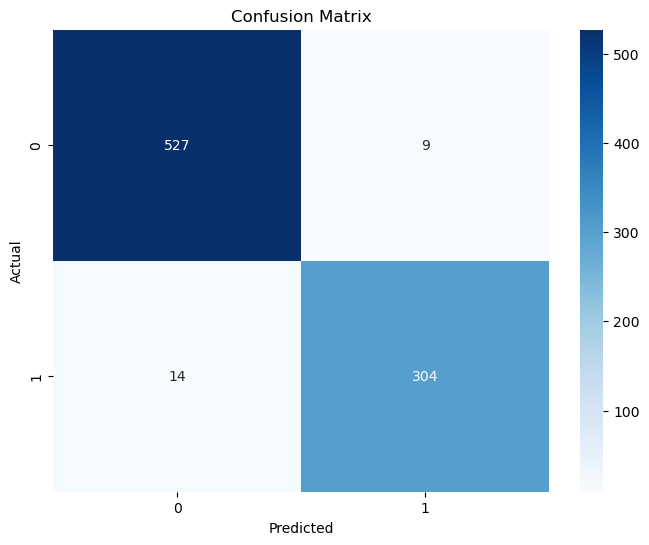

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.9730679156908665
Precision: 0.9730510773424277
Recall: 0.9730679156908665
F1 Score: 0.9730237281563717
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.97      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

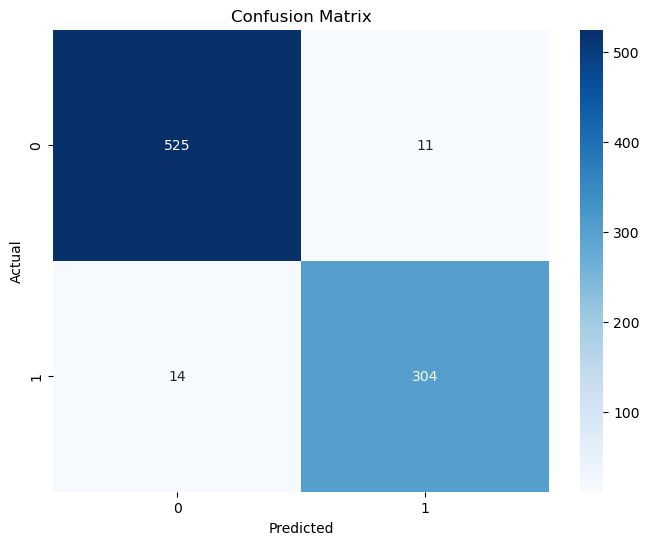

XGBoost Classifier Metrics:
Accuracy: 0.9707259953161592
Precision: 0.9706945669474942
Recall: 0.9707259953161592
F1 Score: 0.9706974730852098
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.97      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [248]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/30
86/86 [==============================] - 1s 5ms/step - loss: 0.2043 - accuracy: 0.9480 - val_loss: 0.0889 - val_accuracy: 0.9619
Epoch 2/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9616 - val_loss: 0.0781 - val_accuracy: 0.9575
Epoch 3/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9689 - val_loss: 0.1019 - val_accuracy: 0.9561
Epoch 4/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9678 - val_loss: 0.0801 - val_accuracy: 0.9575
Epoch 5/30
27/27 [==============================] - 0s 1ms/step


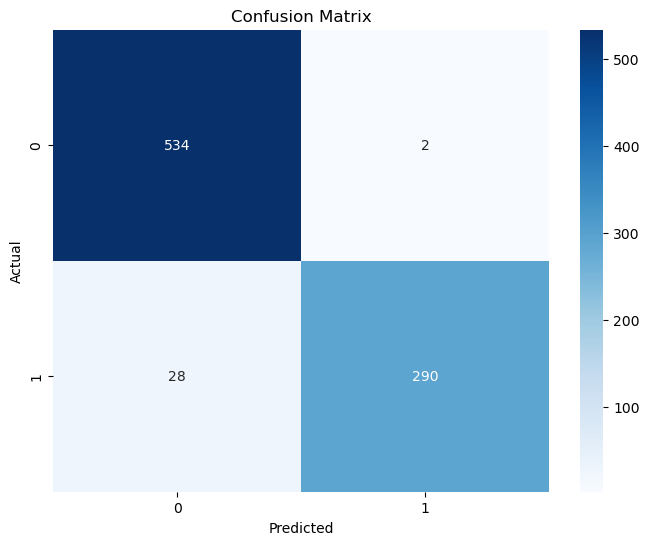

FNN Classifier Metrics:
Accuracy: 0.9648711943793911
Precision: 0.966179498212763
Recall: 0.9648711943793911
F1 Score: 0.9645384625228752
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       536
           1       0.99      0.91      0.95       318

    accuracy                           0.96       854
   macro avg       0.97      0.95      0.96       854
weighted avg       0.97      0.96      0.96       854



In [249]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/100
107/107 [==============================] - 4s 7ms/step - loss: 0.3263
Epoch 2/100
107/107 [==============================] - 1s 7ms/step - loss: 0.1550
Epoch 3/100
107/107 [==============================] - 1s 7ms/step - loss: 0.1021
Epoch 4/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0849
Epoch 5/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0670
Epoch 6/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0576
Epoch 7/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0480
Epoch 8/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0406
Epoch 9/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0394
Epoch 10/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0360
Epoch 11/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0343
Epoch 12/100
107/107 [==============================] - 1s 7ms/step - loss: 0.0325
Epoch 13/100


107/107 [==============================] - 1s 7ms/step - loss: 0.0226
Epoch 100/100
27/27 [==============================] - 0s 3ms/step


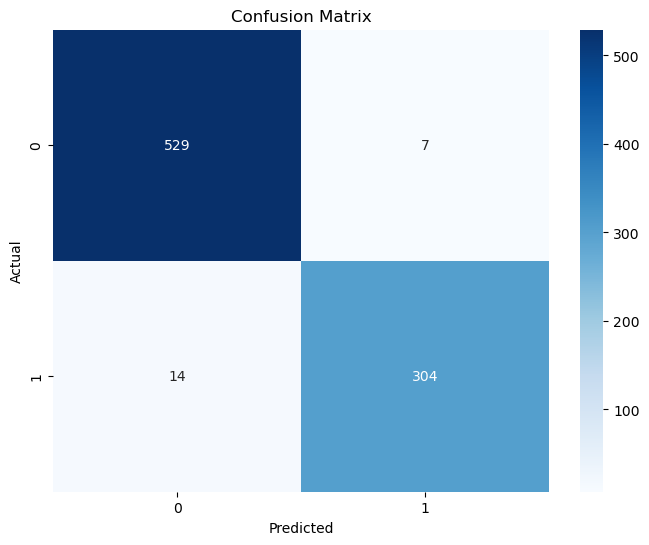

RNN Classifier Metrics:
Accuracy: 0.9754098360655737
Precision: 0.9754366774604991
Recall: 0.9754098360655737
F1 Score: 0.9753527710563181
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [252]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/50
107/107 [==============================] - 17s 20ms/step - loss: 0.0871
Epoch 2/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0504
Epoch 3/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0424
Epoch 4/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0376
Epoch 5/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0350
Epoch 6/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0324
Epoch 7/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0310
Epoch 8/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0297
Epoch 9/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0287
Epoch 10/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0290
Epoch 11/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0287
Epoch 12/50
107/107 [==============================] - 2s 20ms/step - loss: 0.0274
Epoch 13/50


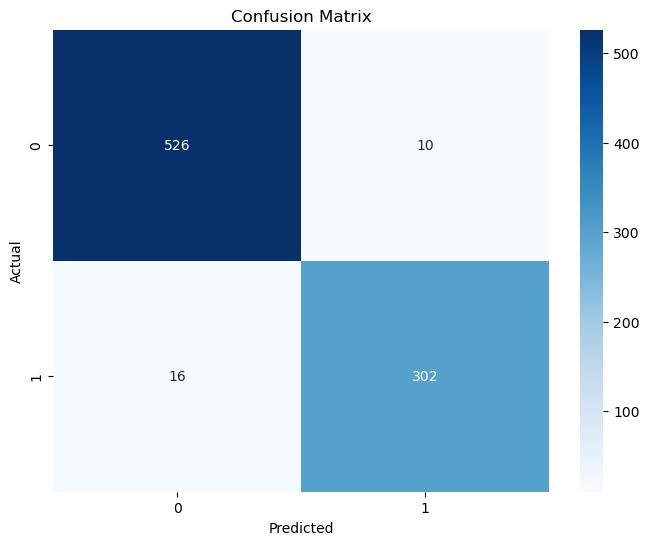

LSTM (beter version of RNN) Classifier Metrics:
Accuracy: 0.9695550351288056
Precision: 0.9695372530198009
Recall: 0.9695550351288056
F1 Score: 0.9694947853529318
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.97      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [253]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)



  

# Predict on the test set
y_pred = regressor.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LSTM (beter version of RNN) Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


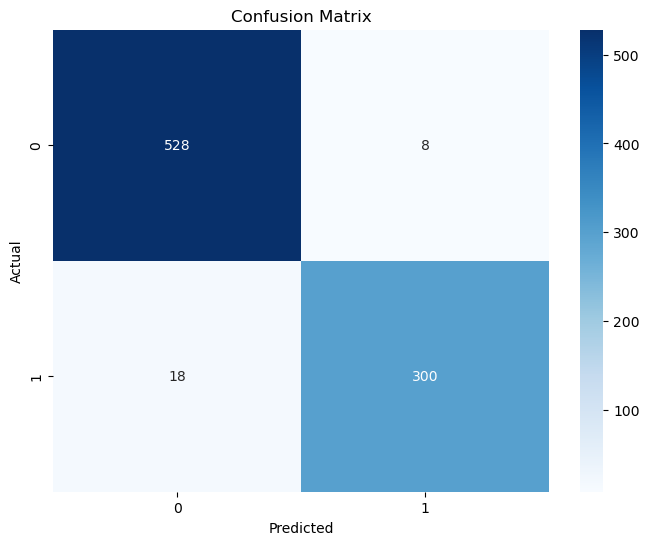

Ensemble Classifier Metrics:
Accuracy: 0.9695550351288056
Precision: 0.9696369204565926
Recall: 0.9695550351288056
F1 Score: 0.9694525528602781
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.97      0.94      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



In [250]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [251]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model